## Import useful packages

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [219]:
# for web scraping (method 1)
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq 

In [220]:
# for data api (method 3)
import requests

## Geographical

## Method 1: Scrape from website

In [221]:
# url = 'https://databank.worldbank.org/reports.aspx?source=2&series=SH.DYN.AIDS.ZS&country='
# uClient = uReq(url)
# page_soup = soup(uClient.read(), "html.parser")
# uClient.close()

page_soup = soup(open('hiv.html'), "html.parser")

In [222]:
containers = page_soup.findAll("tr", {"class": "dxgvDataRow_GridDefaultTheme"})

In [223]:
# data = pd.DataFrame(columns=['Country','1990', '2000', '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'])
data = pd.DataFrame(columns=['Country','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'])
for container in containers:
    content = container.findAll("td")
    if len(content)<14:
        continue 
    # data = data.append({'Country': content[0].text, '1990': content[1].text, '2000': content[2].text, '2011': content[3].text, '2012': content[4].text, '2013': content[5].text, '2014': content[6].text, '2015': content[7].text, '2016': content[8].text, '2017': content[9].text, '2018': content[10].text, '2019': content[11].text, '2020': content[12].text}, ignore_index=True)
    data = data.append({'Country': content[0].text, '2004': content[1].text, '2005': content[2].text, '2006': content[3].text, '2007': content[4].text, '2008': content[5].text, '2009': content[6].text, '2010': content[7].text, '2011': content[8].text, '2012': content[9].text, '2013': content[10].text, '2014': content[11].text, '2015': content[12].text, '2016': content[13].text, '2017': content[14].text, '2018': content[15].text, '2019': content[16].text, '2020': content[17].text}, ignore_index=True)

In [224]:
data

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,..
1,Albania,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,..
2,Algeria,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,..
3,American Samoa,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4,Andorra,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
213,West Bank and Gaza,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
214,"Yemen, Rep.",0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,..
215,Zambia,13.1,12.8,12.7,12.5,12.5,12.4,12.4,12.5,12.4,12.4,12.3,12.2,12.1,11.9,11.7,11.5,..


## Method 2: Load from csv

In [225]:
data = pd.read_csv('data.csv')

In [226]:
data

,Country,2010,2010_lower,2010_upper,2011,2011_lower,2011_upper,2012,2012_lower,2012_upper,...,2017,2017_lower,2017_upper,2018,2018_lower,2018_upper,2019,2019_lower,2019_upper,2019.1
0,Afghanistan,<1000,<500,1800,<1000,<500,2000,<1000,<500,2300,...,1300,<500,4800,1400,<500,5100,1500,<500,5500,116
1,Albania,<200,<100,<200,<200,<100,<200,<200,<100,<500,...,<100,<100,<500,<100,<100,<500,<100,<100,<500,-23
2,Algeria,1200,<1000,1700,1300,<1000,1900,1400,<1000,2100,...,1900,<1000,3300,2000,<500,3600,2100,<500,4100,83
3,Angola,26 000,21 000,31 000,27 000,22 000,32 000,27 000,22 000,32 000,...,27 000,20 000,34 000,27 000,19 000,35 000,26 000,18 000,34 000,-2
4,Argentina,5700,4600,7500,6000,4700,7900,6100,4800,7900,...,6100,4400,8200,5700,4100,8100,5900,4300,8500,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Viet Nam,16 000,14 000,17 000,15 000,13 000,16 000,13 000,12 000,14 000,...,6700,6000,7300,5700,5100,6300,5200,4600,5700,-68
167,Yemen,<1000,<1000,1200,<1000,<1000,1400,<1000,<1000,1400,...,1000,<500,2000,1000,<500,2100,1000,<500,2200,26
168,Zambia,60 000,51 000,72 000,60 000,51 000,72 000,60 000,51 000,72 000,...,55 000,47 000,67 000,55 000,46 000,66 000,51 000,43 000,61 000,-15
169,Zimbabwe,71 000,50 000,97 000,64 000,45 000,88 000,57 000,40 000,78 000,...,44 000,31 000,60 000,40 000,28 000,54 000,40 000,28 000,54 000,-44


## Method 3: Collect data from API

In [227]:
url = 'https://ghoapi.azureedge.net/api/MDG_0000000029'
data = requests.get(url).json()

In [228]:
data = pd.DataFrame(data['value'])

## Raw Data (From Method 3)

In [229]:
data

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,Dim1Type,Dim1,Dim2Type,Dim2,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,23062909,MDG_0000000029,REGION,GLOBAL,YEAR,1990,None,None,None,None,...,None,0.3 [0.2–0.3],0.3,0.2,0.3,None,2020-07-07T16:21:22.123+02:00,1990,1990-01-01T00:00:00+01:00,1990-12-31T00:00:00+01:00
1,23062910,MDG_0000000029,REGION,GLOBAL,YEAR,1991,None,None,None,None,...,None,0.3 [0.2–0.4],0.3,0.2,0.4,None,2020-07-07T16:21:22.153+02:00,1991,1991-01-01T00:00:00+01:00,1991-12-31T00:00:00+01:00
2,23062911,MDG_0000000029,REGION,GLOBAL,YEAR,1992,None,None,None,None,...,None,0.3 [0.3–0.4],0.3,0.3,0.4,None,2020-07-07T16:21:22.187+02:00,1992,1992-01-01T00:00:00+01:00,1992-12-31T00:00:00+01:00
3,23062912,MDG_0000000029,REGION,GLOBAL,YEAR,1993,None,None,None,None,...,None,0.4 [0.3–0.5],0.4,0.3,0.5,None,2020-07-07T16:21:22.2+02:00,1993,1993-01-01T00:00:00+01:00,1993-12-31T00:00:00+01:00
4,23062913,MDG_0000000029,REGION,GLOBAL,YEAR,1994,None,None,None,None,...,None,0.4 [0.4–0.5],0.4,0.4,0.5,None,2020-07-07T16:21:22.217+02:00,1994,1994-01-01T00:00:00+01:00,1994-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,23098784,MDG_0000000029,COUNTRY,VEN,YEAR,2019,None,None,None,None,...,None,0.6 [0.5–0.7],0.6,0.5,0.7,None,2020-07-09T16:27:32.017+02:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
3606,23098785,MDG_0000000029,COUNTRY,VNM,YEAR,2019,None,None,None,None,...,None,0.3 [0.3–0.4],0.3,0.3,0.4,None,2020-07-09T16:27:32.05+02:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
3607,23098786,MDG_0000000029,COUNTRY,YEM,YEAR,2019,None,None,None,None,...,None,<0.1 [<0.1–0.1],NaN,NaN,0.1,None,2020-07-09T16:27:32.063+02:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
3608,23098787,MDG_0000000029,COUNTRY,ZMB,YEAR,2019,None,None,None,None,...,None,11.5 [10.9–12.1],11.5,10.9,12.1,None,2020-07-09T16:27:32.08+02:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00


## Data processing

In [230]:
data = data[['TimeDim','SpatialDim','Value']]

In [231]:
data = data.sort_values(by=['TimeDim','SpatialDim'])

In [232]:
for i in range(data.shape[0]):
    if data.iat[i,2] == 'No data':
        data.iat[i,2] = np.nan
    else:
        values = data.iat[i,2].split()
        data.iat[i,2] = values[0]
        if data.iat[i,2] == '<0.1':
            data.iat[i,2] = 0.05

In [233]:
data['Value'] = data['Value'].astype('float')

In [234]:
data.tail(50)

,TimeDim,SpatialDim,Value
3559,2019,PAN,NaN
3562,2019,PER,0.30
3563,2019,PHL,0.20
3560,2019,PNG,0.90
3564,2019,POL,NaN
3483,2019,PRK,NaN
3565,2019,PRT,NaN
3561,2019,PRY,0.50
3566,2019,QAT,NaN
3569,2019,ROU,0.10


In [153]:
global_data=data[data['SpatialDim']=='GLOBAL']

In [154]:
print(global_data)

    TimeDim SpatialDim  Value
0      1990     GLOBAL    0.3
1      1991     GLOBAL    0.3
2      1992     GLOBAL    0.3
3      1993     GLOBAL    0.4
4      1994     GLOBAL    0.4
5      1995     GLOBAL    0.5
6      1996     GLOBAL    0.5
7      1997     GLOBAL    0.6
8      1998     GLOBAL    0.6
9      1999     GLOBAL    0.6
10     2000     GLOBAL    0.6
11     2001     GLOBAL    0.6
12     2002     GLOBAL    0.7
13     2003     GLOBAL    0.7
14     2004     GLOBAL    0.7
15     2005     GLOBAL    0.7
16     2006     GLOBAL    0.7
17     2007     GLOBAL    0.7
18     2008     GLOBAL    0.7
19     2009     GLOBAL    0.7
20     2010     GLOBAL    0.7
21     2011     GLOBAL    0.7
22     2012     GLOBAL    0.7
23     2013     GLOBAL    0.7
24     2014     GLOBAL    0.7
25     2015     GLOBAL    0.7
26     2016     GLOBAL    0.7
27     2017     GLOBAL    0.7
28     2018     GLOBAL    0.7
29     2019     GLOBAL    0.7


In [155]:
data2=data.groupby('SpatialDim')['Value'].mean().reset_index()
data2.head(50)

,SpatialDim,Value
0,AFG,0.050000
1,AFR,3.966667
2,AGO,1.520000
3,ALB,0.050000
4,AMR,0.373333
5,ARE,NaN
6,ARG,0.360000
7,ARM,0.162500
8,AUS,0.100000
9,AUT,NaN


In [156]:
data2 = data2.sort_values(by='Value')
data2 = data2.dropna()
data2.head(10)

,SpatialDim,Value
0,AFG,0.05
173,YEM,0.05
162,TUN,0.05
154,SYR,0.05
147,SRB,0.05
124,NZL,0.05
111,MNG,0.05
110,MNE,0.05
101,MAR,0.05
96,LKA,0.05


In [157]:
data2 = data2.sort_values(by='Value')
data2 = data2.dropna()
data2.tail(10)

,SpatialDim,Value
165,UGA,6.800
115,MWI,11.145
112,MOZ,11.335
175,ZMB,12.640
117,NAM,12.755
176,ZWE,16.300
174,ZAF,17.370
27,BWA,23.440
97,LSO,24.025
153,SWZ,26.560


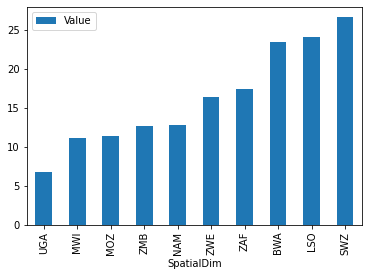

In [158]:
data2.tail(10).plot.bar(x='SpatialDim',y='Value')

In [159]:
data2 = data.groupby('TimeDim')['Value'].mean()
data2.tail(30)

TimeDim
1990    0.414286
1991    0.478571
1992    0.535714
1993    0.607143
1994    0.664286
1995    0.735714
1996    0.771429
1997    0.814286
1998    0.842857
1999    0.857143
2000    2.258915
2001    2.267054
2002    2.253101
2003    2.233721
2004    2.203488
2005    2.177132
2006    2.155814
2007    2.139922
2008    2.128295
2009    2.125194
2010    2.119767
2011    2.113178
2012    2.108527
2013    2.101550
2014    2.088760
2015    2.069380
2016    2.046512
2017    2.017829
2018    1.979070
2019    1.956641
Name: Value, dtype: float64

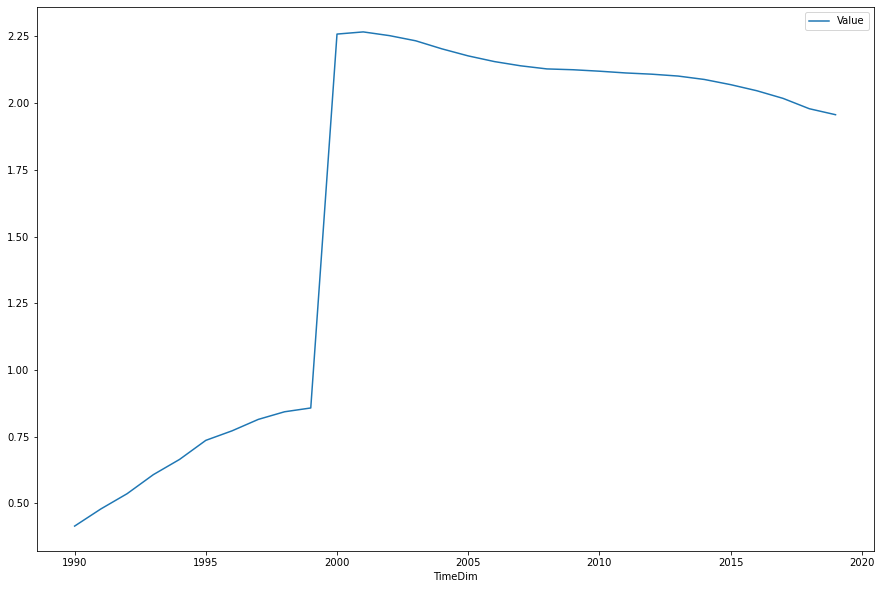

In [160]:
data2.plot(legend=True,figsize=(15,10))

# Education

In [177]:
df_edu = pd.read_csv('Education Index.csv')
df_edu[['Country','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.302,0.312,0.324,0.336,0.342,0.352,0.372,0.374,0.39,0.398,0.403,0.405,0.406,0.408,0.413
1,Albania,0.606,0.623,0.629,0.642,0.646,0.652,0.673,0.715,0.743,0.763,0.774,0.77,0.761,0.758,0.758
2,Algeria,0.557,0.57,0.577,0.588,0.588,0.608,0.626,0.644,0.639,0.659,0.662,0.663,0.668,0.674,0.675
3,Andorra,0.649,0.626,0.646,0.647,0.661,0.661,0.662,0.663,0.715,0.705,0.715,0.704,0.708,0.701,0.708
4,Angola,0.336,0.348,0.362,0.376,0.39,0.404,0.398,0.423,0.435,0.447,0.46,0.472,0.487,0.498,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Sub-Saharan Africa,0.379,0.387,0.395,0.404,0.417,0.425,0.422,0.429,0.437,0.449,0.452,0.457,0.46,0.465,0.466
202,Least Developed Countries,0.328,0.338,0.346,0.355,0.366,0.377,0.388,0.396,0.403,0.408,0.411,0.419,0.424,0.43,0.431
203,Small Island Developing States,0.555,0.561,0.572,0.584,0.596,0.601,0.607,0.613,0.604,0.609,0.615,0.621,0.624,0.628,0.627
204,Organization for Economic Co-operation and Dev...,0.782,0.787,0.793,0.798,0.805,0.811,0.818,0.824,0.828,0.835,0.841,0.846,0.85,0.851,0.852


In [178]:
df_edu = pd.melt(df_edu, id_vars=['Country'], value_vars=['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'])

In [179]:
df_edu

,Country,variable,value
0,Afghanistan,2004,0.302
1,Albania,2004,0.606
2,Algeria,2004,0.557
3,Andorra,2004,0.649
4,Angola,2004,0.336
...,...,...,...
3085,Sub-Saharan Africa,2018,0.466
3086,Least Developed Countries,2018,0.431
3087,Small Island Developing States,2018,0.627
3088,Organization for Economic Co-operation and Dev...,2018,0.852


In [180]:
df_edu.columns = ['Country','Year','EDU']

In [207]:
df = pd.merge(df_edu,df_hiv).dropna()
df.loc[df['EDU']=='..','EDU'] = np.nan
df['EDU'] = df['EDU'].astype(float)

In [208]:
df

,Country,Year,EDU,HIV
0,Afghanistan,2004,0.302,0.1
1,Albania,2004,0.606,0.1
2,Algeria,2004,0.557,0.1
4,Angola,2004,0.336,1.2
6,Argentina,2004,0.760,0.3
...,...,...,...,...
2451,Ukraine,2018,0.797,1.0
2454,United States,2018,0.899,0.4
2456,Uzbekistan,2018,0.718,0.2
2458,Zambia,2018,0.572,11.7


In [209]:
df['Ratio'] = df['HIV']/df['EDU'] 

In [210]:
df['EDU'] = df['EDU']*10

In [211]:
import seaborn as sns

In [212]:
print(df)

            Country  Year   EDU   HIV      Ratio
0       Afghanistan  2004  3.02   0.1   0.331126
1           Albania  2004  6.06   0.1   0.165017
2           Algeria  2004  5.57   0.1   0.179533
4            Angola  2004  3.36   1.2   3.571429
6         Argentina  2004  7.60   0.3   0.394737
...             ...   ...   ...   ...        ...
2451        Ukraine  2018  7.97   1.0   1.254705
2454  United States  2018  8.99   0.4   0.444939
2456     Uzbekistan  2018  7.18   0.2   0.278552
2458         Zambia  2018  5.72  11.7  20.454545
2459       Zimbabwe  2018  5.68  13.1  23.063380

[1590 rows x 5 columns]


In [213]:
df=df[df['Year']=='2018']

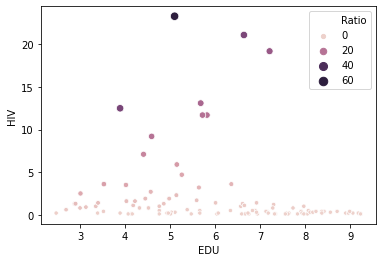

In [214]:
sns.scatterplot(data=df, x="EDU", y="HIV", hue="Ratio", size="Ratio")